## 1. Mount on Google Drive

In [1]:
# Add Google Drive as an accessible path (Optional if you are running from Jupyter Notebook)
from google.colab import drive
drive.mount('/content/drive')

# change path to the designated google drive folder
# otherwise, data will be saved in /content folder which you may have issue locating 
%cd /content/drive/MyDrive/

Mounted at /content/drive
/content/drive/MyDrive


## 2. Pip Install + Import Libraries

In [2]:
# Import libraries
import urllib.request,sys,time
from bs4 import BeautifulSoup
import requests
import pandas as pd

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np

import re
import string

from PIL import Image
import os
from os import path
import csv


import nltk
from nltk.corpus import stopwords

##Functions

In [3]:
# Function to create a dictionary with word counts from dataframe 
def count_words_from_dataframe(df):
    result_dict = {}
    # iterate rows of dataframe 
    for index, row in df.iterrows():
        text = row["clean_text_2"]
        
        # this will split a sentence into words 
        tokens = text.split()
        
        # iterate each word 
        for i in range(0, len(tokens)):
            token = tokens[i].rstrip()
            token=token.strip()
            try:
                result_dict[token] += 1
            except KeyError:
                result_dict[token] = 1
                    
    return result_dict

In [4]:
# Function to write Word Cloud to file
def makeImage(termDict, outputfile):
    
    wc = WordCloud(max_font_size=150, width=1280, height=720, background_color="white")    

    ### generate word cloud using frequencies!
    wc.generate_from_frequencies(termDict)
    wc.to_file(outputfile+".png")
    wc.to_file(outputfile+".pdf")
    
    ### show the figure
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show() 

In [5]:
import string
def clean_text_round1(text):
    '''Make text lowercase, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'http\S+', '', text)
    return text

In [6]:
# Download stopwords
nltk.download('stopwords')

# Variable 'stop' set to list of english stopwords from nltk library
stop = stopwords.words('english')
stop.extend(['ngl','lol','thats','theyre','tbh','idk','rall','theres','youre','yall','dont','aint','ive','arent','havent','wtf','thatll','omg','theyd','woah','fucking','wouldve','shit','wouldve','werent','repost','deleted','heres','wouldnt','fuck','cant','haha'])

def clean_text_round2(text):
    return ' '.join([word for word in text.split() if word not in (stop)])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
def read_word_count_file(file_path):
    with open(file_path, mode='r', encoding="latin1") as infile:
        reader = csv.reader(infile)
        counts = {}
        for row in reader:
            if len(row) >0 :
                counts[row[0]] = float(row[1])
        return counts
                
                
        #counts = {rows[0]: float(rows[1]) for rows in reader}
    #return counts

# 3. Reading Data from File

In [8]:
comments=[]
with open('Colab Notebooks/StickNBowls_Reviews_Combined.csv','r', encoding="latin1") as f:
  csv_reader = csv.reader(f)
  for row in csv_reader:
    comments.extend(row)

labels="Reviews"
comments=comments[1:]
#length=len(comments)



In [9]:
print(comments)

[' Unagi Toji Don', ' Mentaiko Fries and Lok Lok.', 'All are very tasty! The Lok Lok sticks are deep fried version and very crispy even though takeaway. Salmon and unagi portion are good. Mentaiko fries also remain crispy after some time.', 'Definitely will purchase again!"', 'Was looking forward to try this, but got super shocked at this outrageous shaoxing braised pork bowl. Expected to have egg per the picture in the menu but only got meat+rice. Couldve gotten more from my $5 at a caifan stall w rice+meat+others. Not going to go back again', 'Ordered the lok lok and requested to go with the rice ($5.50), so technically its a "lok lok rice bowl" which you can see from the picture.\n\nAll items are well fried and goes well with the sauce, broccoli is very well fried especially.\n\nRice is well cooked too\n\nSuggest to have something sourish to offset the jelat-ness as it is all fried items.\nMaybe lemon sauce, pickled radish or ginger would be good.\n\nVariety of the lok lok can be mo

# 4. Data Cleaning and EDA

In [10]:
comments_df = pd.DataFrame(comments)
comments_df.columns = ["Reviews"]
comments_df


,Reviews
0,Unagi Toji Don
1,Mentaiko Fries and Lok Lok.
2,All are very tasty! The Lok Lok sticks are dee...
3,"Definitely will purchase again!"""
4,"Was looking forward to try this, but got super..."
5,Ordered the lok lok and requested to go with t...
6,Have been wanting to try and finally I did. My...
7,Amazing find at a coffee shop. They serve diff...
8,"Value for money. On first look, the bowls look..."
9,Food was OK but I'm totally disappointed with ...


In [11]:
import string
def clean_text_round1(text):
    '''Make text lowercase, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\n','',text) #remove \n which act as extra lines in reviews
    return text

In [12]:
comments_df["clean_text_1"]=comments_df['Reviews'].apply(clean_text_round1)
comments_df

,Reviews,clean_text_1
0,Unagi Toji Don,unagi toji don
1,Mentaiko Fries and Lok Lok.,mentaiko fries and lok lok
2,All are very tasty! The Lok Lok sticks are dee...,all are very tasty the lok lok sticks are deep...
3,"Definitely will purchase again!""",definitely will purchase again
4,"Was looking forward to try this, but got super...",was looking forward to try this but got super ...
5,Ordered the lok lok and requested to go with t...,ordered the lok lok and requested to go with t...
6,Have been wanting to try and finally I did. My...,have been wanting to try and finally i did my ...
7,Amazing find at a coffee shop. They serve diff...,amazing find at a coffee shop they serve diffe...
8,"Value for money. On first look, the bowls look...",value for money on first look the bowls look s...
9,Food was OK but I'm totally disappointed with ...,food was ok but im totally disappointed with t...


In [13]:
comments_df['clean_text_2']=comments_df['clean_text_1'].apply(clean_text_round2)
comments_df

,Reviews,clean_text_1,clean_text_2
0,Unagi Toji Don,unagi toji don,unagi toji
1,Mentaiko Fries and Lok Lok.,mentaiko fries and lok lok,mentaiko fries lok lok
2,All are very tasty! The Lok Lok sticks are dee...,all are very tasty the lok lok sticks are deep...,tasty lok lok sticks deep fried version crispy...
3,"Definitely will purchase again!""",definitely will purchase again,definitely purchase
4,"Was looking forward to try this, but got super...",was looking forward to try this but got super ...,looking forward try got super shocked outrageo...
5,Ordered the lok lok and requested to go with t...,ordered the lok lok and requested to go with t...,ordered lok lok requested go rice technically ...
6,Have been wanting to try and finally I did. My...,have been wanting to try and finally i did my ...,wanting try finally sons loved salmon much gar...
7,Amazing find at a coffee shop. They serve diff...,amazing find at a coffee shop they serve diffe...,amazing find coffee shop serve different type ...
8,"Value for money. On first look, the bowls look...",value for money on first look the bowls look s...,value money first look bowls look small itâs...
9,Food was OK but I'm totally disappointed with ...,food was ok but im totally disappointed with t...,food ok im totally disappointed takeaway nonse...


In [14]:
cleaned_df = comments_df[['clean_text_2']]
cleaned_df

,clean_text_2
0,unagi toji
1,mentaiko fries lok lok
2,tasty lok lok sticks deep fried version crispy...
3,definitely purchase
4,looking forward try got super shocked outrageo...
5,ordered lok lok requested go rice technically ...
6,wanting try finally sons loved salmon much gar...
7,amazing find coffee shop serve different type ...
8,value money first look bowls look small itâs...
9,food ok im totally disappointed takeaway nonse...


In [15]:
#REMOVE WORDS CONFIRM HIGH LOL
count_type = 'unigram'

result = count_words_from_dataframe(cleaned_df)
try: 
  del result['stick n bowls']
except:
  print('an error')

## soring the words based on their frequency
sorted_dic = ((k, result[k]) for k in sorted(result, key=result.get, reverse=True))

## write the dictionary in a file
with open(f"./sticknbowlsreviews_unigram_counts.csv", 'w', encoding="latin1") as fp:
    writer = csv.writer(fp, delimiter=',')
    writer.writerows(sorted_dic)

an error


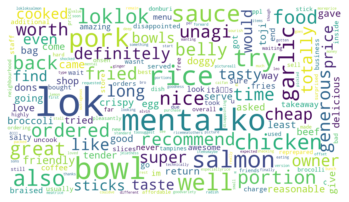

In [16]:
### Create ```plot``` folder 
os.makedirs('plot', exist_ok=True)

mypath="."
### We're using one of the utility function! "read_word_count_file"
fullTermsDict = read_word_count_file(f'{mypath}/sticknbowlsreviews_unigram_counts.csv')
outputfile = f"{mypath}/Colab Notebooks/Unigram/wordcloud_count_unigram_sticknbowls_reviews"
makeImage(fullTermsDict, outputfile)

In [17]:
reviews_list=cleaned_df['clean_text_2'].tolist()

In [18]:
reviews_list

['unagi toji',
 'mentaiko fries lok lok',
 'tasty lok lok sticks deep fried version crispy even though takeaway salmon unagi portion good mentaiko fries also remain crispy time',
 'definitely purchase',
 'looking forward try got super shocked outrageous shaoxing braised pork bowl expected egg per picture menu got meatrice couldve gotten caifan stall w ricemeatothers going go back',
 'ordered lok lok requested go rice technically lok lok rice bowl see pictureall items well fried goes well sauce broccoli well fried especiallyrice well cooked toosuggest something sourish offset jelatness fried itemsmaybe lemon sauce pickled radish ginger would goodvariety lok lok moreprice reasonable lok lok',
 'wanting try finally sons loved salmon much garlic pork belly awesome going back try rest menu im sure never disappointing leo alvin thanks bunch bro ð\x9f\x91\x80 soon',
 'amazing find coffee shop serve different type bowls lokloksalmon mentai bowl good coffee shop standard lok lok fried well',
 '

# 5. Hugging Face Text Classification

In [19]:
# this will take some time
!pip install datasets transformers[sentencepiece]

     |████████████████████████████████| 325 kB 4.1 MB/s 
     |████████████████████████████████| 3.8 MB 46.5 MB/s 
     |████████████████████████████████| 67 kB 5.3 MB/s 
     |████████████████████████████████| 136 kB 53.0 MB/s 
     |████████████████████████████████| 1.1 MB 36.5 MB/s 
     |████████████████████████████████| 212 kB 50.1 MB/s 
     |████████████████████████████████| 127 kB 48.2 MB/s 
     |████████████████████████████████| 94 kB 3.1 MB/s 
     |████████████████████████████████| 144 kB 50.1 MB/s 
     |████████████████████████████████| 271 kB 49.0 MB/s 
     |████████████████████████████████| 596 kB 40.9 MB/s 
     |████████████████████████████████| 895 kB 48.2 MB/s 
     |████████████████████████████████| 6.6 MB 33.4 MB/s 
     |████████████████████████████████| 1.2 MB 31.3 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyyaml
   

In [20]:
## This will enable your coLab to use GPU!!! 
import torch
device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cuda:0'

In [21]:
from transformers import pipeline

*italicized text*## Pre-COVID-19

In [22]:
# Load the "sentiment prediction" model.
classifier = pipeline("sentiment-analysis", device = 0)

# input: sentence, output: sentiment label and score
sentiment_list= classifier(reviews_list)
zipped_list=[]
for i in range(len(reviews_list)):
  zipped=[reviews_list[i],sentiment_list[i]['label'],sentiment_list[i]['score']]
  zipped_list.append(zipped)

df_sentiment=pd.DataFrame(zipped_list, columns=['review','sentiment','sentiment score'])

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [23]:
df_sentiment

,review,sentiment,sentiment score
0,unagi toji,POSITIVE,0.948584
1,mentaiko fries lok lok,NEGATIVE,0.935047
2,tasty lok lok sticks deep fried version crispy...,POSITIVE,0.993832
3,definitely purchase,POSITIVE,0.999819
4,looking forward try got super shocked outrageo...,NEGATIVE,0.993320
5,ordered lok lok requested go rice technically ...,NEGATIVE,0.956964
6,wanting try finally sons loved salmon much gar...,POSITIVE,0.997719
7,amazing find coffee shop serve different type ...,POSITIVE,0.994421
8,value money first look bowls look small itâs...,NEGATIVE,0.773530
9,food ok im totally disappointed takeaway nonse...,NEGATIVE,0.994790


In [24]:
positive_review = df_sentiment.loc[df_sentiment['sentiment'] == 'POSITIVE']

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
positive_review

,review,sentiment,sentiment score
0,unagi toji,POSITIVE,0.948584
2,tasty lok lok sticks deep fried version crispy even though takeaway salmon unagi portion good mentaiko fries also remain crispy time,POSITIVE,0.993832
3,definitely purchase,POSITIVE,0.999819
6,wanting try finally sons loved salmon much garlic pork belly awesome going back try rest menu im sure never disappointing leo alvin thanks bunch bro ð soon,POSITIVE,0.997719
7,amazing find coffee shop serve different type bowls lokloksalmon mentai bowl good coffee shop standard lok lok fried well,POSITIVE,0.994421
12,ordered garlic pork belly rice bowl chose spicy option pork belly portion generous overall taste dish fantastic price friendly polite young owner well definitely back try rice bowls lok lok,POSITIVE,0.992137
13,lok lok tasty price reasonablestaff friendly wellwaiting time abit long thou,POSITIVE,0.949912
15,amazing salmon mentaiko donburi pleasantly surprised salmon well cooked still tender generous amount mentaiko sauce cooked salmon iâve tried hawkers normally cooked flakythe portion great well great bang buck wouldâve preferred slices vegetables bowl,POSITIVE,0.998298
16,came try friends love mentaiko salmon garlic pork mentaiko chicken food delicious itâs nice find adorable dons neighbourhood areas would love come try loklok next time ð,POSITIVE,0.995614
18,nice foodfreshly donetaste orientation waiting time recommend anyone loves taste new style dish delicious freshly made,POSITIVE,0.998448


In [25]:
positive_review['sentiment score'].mean()

0.9754663474029965

In [26]:
negative_review = df_sentiment.loc[df_sentiment['sentiment'] == 'NEGATIVE']
negative_review

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
negative_review

,review,sentiment,sentiment score
1,mentaiko fries lok lok,NEGATIVE,0.935047
4,looking forward try got super shocked outrageous shaoxing braised pork bowl expected egg per picture menu got meatrice couldve gotten caifan stall w ricemeatothers going go back,NEGATIVE,0.993320
5,ordered lok lok requested go rice technically lok lok rice bowl see pictureall items well fried goes well sauce broccoli well fried especiallyrice well cooked toosuggest something sourish offset jelatness fried itemsmaybe lemon sauce pickled radish ginger would goodvariety lok lok moreprice reasonable lok lok,NEGATIVE,0.956964
8,value money first look bowls look small itâs really packed goodness start eating portions nicei ordered unagi toji kicap manis pork belly bowl suggestion owner might want reduce sauce rice gets salty towards end,NEGATIVE,0.773530
9,food ok im totally disappointed takeaway nonsense u charge additional ¢ sticks lok lok doggy bag regular buying loklok snack food everytime nearby usually sticks yesterday bought bcos selections wasnt u cheek charge additional ¢ doggy bag wasnt even charged past mo ths shameful business like thatup loklok price decent business charging doggy bag like leaves distaste mouth,NEGATIVE,0.994790
10,beef bowl unagi toji bowl recently beef slices tough unagi tender either wait peak hours staff handling orders customer orders seems long,NEGATIVE,0.996650
11,ordered mentaiko chicken bowl chicken served totally uncook inside return store took super long serve asked even reprepared bad apologetic asked refund end beef mushroom bowl well recommend,NEGATIVE,0.856741
14,mentaiko salmon rice bowl way worth generous portion came mentaiko sauce owner also gave free onsen egg far also tried garlic pork belly rice bowl cheap portion garlic pork generous also sell lok lok stick like brocolli loklok best also sauce used totally recommend ppl tampines give try least,NEGATIVE,0.935876
17,lok lok least edible could say way better bedok lok lok frankly speaking limited edition choose overall would grade,NEGATIVE,0.994603
19,enthusiastic try reading online went find shop unfriendly service ordering likely due short manpower single lady back,NEGATIVE,0.998241


In [27]:
negative_review['sentiment score'].mean()

0.9567656046465823

In [28]:
df_sentiment['sentiment'].value_counts()

NEGATIVE    19
POSITIVE    18
Name: sentiment, dtype: int64

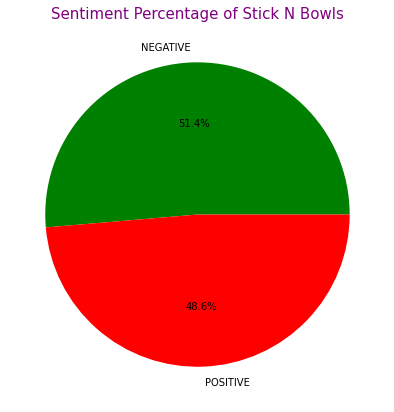

<Figure size 432x288 with 0 Axes>

In [29]:
df = df_sentiment['sentiment'].value_counts()
#pie chart
df.dropna(inplace = True)
labels =df.index
colors = ['green','red']
explode = [0,0]
sizes = df.values

# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title("Sentiment Percentage of Stick N Bowls",color = 'purple',fontsize = 15)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig(f"./Colab Notebooks/Sentiment/StickNBowls_Sentiments.png")

In [30]:
positive_review_list=positive_review['review'].tolist()
negative_review_list=negative_review['review'].tolist()

In [31]:
df_positive_reviews = pd.DataFrame(positive_review_list)
df_positive_reviews 

,0
0,unagi toji
1,tasty lok lok sticks deep fried version crispy even though takeaway salmon unagi portion good mentaiko fries also remain crispy time
2,definitely purchase
3,wanting try finally sons loved salmon much garlic pork belly awesome going back try rest menu im sure never disappointing leo alvin thanks bunch bro ð soon
4,amazing find coffee shop serve different type bowls lokloksalmon mentai bowl good coffee shop standard lok lok fried well
5,ordered garlic pork belly rice bowl chose spicy option pork belly portion generous overall taste dish fantastic price friendly polite young owner well definitely back try rice bowls lok lok
6,lok lok tasty price reasonablestaff friendly wellwaiting time abit long thou
7,amazing salmon mentaiko donburi pleasantly surprised salmon well cooked still tender generous amount mentaiko sauce cooked salmon iâve tried hawkers normally cooked flakythe portion great well great bang buck wouldâve preferred slices vegetables bowl
8,came try friends love mentaiko salmon garlic pork mentaiko chicken food delicious itâs nice find adorable dons neighbourhood areas would love come try loklok next time ð
9,nice foodfreshly donetaste orientation waiting time recommend anyone loves taste new style dish delicious freshly made


In [32]:
df_positive_reviews.to_csv(f"./Colab Notebooks/Sentiment/stickNbowlsreviews_postive_counts.csv", 'w', encoding="latin1")

In [33]:
df_negative_reviews = pd.DataFrame(negative_review_list)
df_negative_reviews

,0
0,mentaiko fries lok lok
1,looking forward try got super shocked outrageous shaoxing braised pork bowl expected egg per picture menu got meatrice couldve gotten caifan stall w ricemeatothers going go back
2,ordered lok lok requested go rice technically lok lok rice bowl see pictureall items well fried goes well sauce broccoli well fried especiallyrice well cooked toosuggest something sourish offset jelatness fried itemsmaybe lemon sauce pickled radish ginger would goodvariety lok lok moreprice reasonable lok lok
3,value money first look bowls look small itâs really packed goodness start eating portions nicei ordered unagi toji kicap manis pork belly bowl suggestion owner might want reduce sauce rice gets salty towards end
4,food ok im totally disappointed takeaway nonsense u charge additional ¢ sticks lok lok doggy bag regular buying loklok snack food everytime nearby usually sticks yesterday bought bcos selections wasnt u cheek charge additional ¢ doggy bag wasnt even charged past mo ths shameful business like thatup loklok price decent business charging doggy bag like leaves distaste mouth
5,beef bowl unagi toji bowl recently beef slices tough unagi tender either wait peak hours staff handling orders customer orders seems long
6,ordered mentaiko chicken bowl chicken served totally uncook inside return store took super long serve asked even reprepared bad apologetic asked refund end beef mushroom bowl well recommend
7,mentaiko salmon rice bowl way worth generous portion came mentaiko sauce owner also gave free onsen egg far also tried garlic pork belly rice bowl cheap portion garlic pork generous also sell lok lok stick like brocolli loklok best also sauce used totally recommend ppl tampines give try least
8,lok lok least edible could say way better bedok lok lok frankly speaking limited edition choose overall would grade
9,enthusiastic try reading online went find shop unfriendly service ordering likely due short manpower single lady back


In [34]:
df_negative_reviews.to_csv(f"./Colab Notebooks/Sentiment/stickNbowlsreviews_negative_counts.csv", 'w', encoding="latin1")

# 6. Topic Analysis BERTopic

## MENTAIYA TOPIC MODELLING

In [36]:
!pip install distributed==2021.9.0

     |████████████████████████████████| 779 kB 4.1 MB/s 
     |████████████████████████████████| 1.0 MB 41.7 MB/s 
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 1.3.0
    Uninstalling cloudpickle-1.3.0:
      Successfully uninstalled cloudpickle-1.3.0
  Attempting uninstall: dask
    Found existing installation: dask 2.12.0
    Uninstalling dask-2.12.0:
      Successfully uninstalled dask-2.12.0
  Attempting uninstall: distributed
    Found existing installation: distributed 1.25.3
    Uninstalling distributed-1.25.3:
      Successfully uninstalled distributed-1.25.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gym 0.17.3 requires cloudpickle<1.7.0,>=1.2.0, but you have cloudpickle 2.0.0 which is incompatible.


In [35]:
!pip install bertopic

     |████████████████████████████████| 57 kB 2.4 MB/s 
     |████████████████████████████████| 636 kB 8.5 MB/s 
     |████████████████████████████████| 86 kB 5.7 MB/s 
     |████████████████████████████████| 79 kB 8.0 MB/s 
     |████████████████████████████████| 5.2 MB 43.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.1 MB 54.4 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2330751 sha256=a309fd667a1ebc80254c77cfa08f9e1b8a2bb86f414e7194b5670b64229f387a
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=daab4c1b9600e0a59488951f3989f6c619c02d715d01885d04da9d97582819d8
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144

In [37]:
from bertopic import BERTopic
BERTopic

bertopic._bertopic.BERTopic

STICKNBOWLS POSITIVE!!!!!

In [38]:
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(positive_review_list)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2022-04-01 08:43:47,375 - BERTopic - Transformed documents to Embeddings
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
2022-04-01 08:43:58,115 - BERTopic - Reduced dimensionality with UMAP
2022-04-01 08:43:58,131 - BERTopic - Clustered UMAP embeddings with HDBSCAN


In [39]:
freq = topic_model.get_topic_info(); freq.head(20)

,Topic,Count,Name
0,-1,18,-1_lok_mentaiko_salmon_try


In [40]:
topic_model.get_topic(0)  # Select the most frequent topic

False

In [41]:
topic_model.visualize_barchart(top_n_topics=0)

ValueError: ignored

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors


cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

tps = topic_model.get_topics()

fig, axes = plt.subplots(1, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(tps[i])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [ ]:
#value of n_clusters doens't seem to affect the heatmap
topic_model.visualize_heatmap(n_clusters=3, width=1000, height=1000)

In [ ]:
# Visualize Topic Probabilities
topic_model.visualize_distribution(probs[1], min_probability=0.015)

In [ ]:
topic_model.get_topics()

In [ ]:
topic_model.visualize_topics()

## FUKUDON NEGATIVE

In [ ]:
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(negative_review_list)

In [ ]:
freq = topic_model.get_topic_info(); freq.head(20)

In [ ]:
topic_model.get_topic(1)  # Select the most frequent topic

In [ ]:
topic_model.visualize_barchart(top_n_topics=3)

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors


cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

tps = topic_model.get_topics()

fig, axes = plt.subplots(1, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(tps[i])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [ ]:
#value of n_clusters doens't seem to affect the heatmap
topic_model.visualize_heatmap(n_clusters=2, width=1000, height=1000)

In [ ]:
# Visualize Topic Probabilities
topic_model.visualize_distribution(probs[1], min_probability=0.015)

In [ ]:
topic_model.visualize_topics()

an error


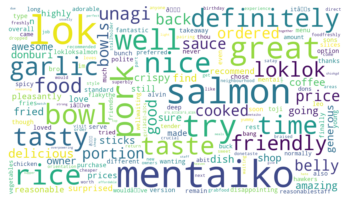

In [42]:

########### WORDCLOUD BC CANNOT TOPIC MODEL!!!!!!!!!!! ############# POSITIVE REVIEWS
df_positive_reviews.columns = ['clean_text_2']

#REMOVE WORDS CONFIRM HIGH LOL
count_type = 'unigram'

result = count_words_from_dataframe(df_positive_reviews)
try: 
  del result['sticknbowls']
except:
  print('an error')

## soring the words based on their frequency
sorted_dic = ((k, result[k]) for k in sorted(result, key=result.get, reverse=True))

## write the dictionary in a file
with open(f"./sticknbowlsreviews_unigram_posreviews.csv", 'w', encoding="latin1") as fp:
    writer = csv.writer(fp, delimiter=',')
    writer.writerows(sorted_dic)

### Create ```plot``` folder 
os.makedirs('plot', exist_ok=True)

mypath="."
### We're using one of the utility function! "read_word_count_file"
fullTermsDict = read_word_count_file(f'{mypath}/sticknbowlsreviews_unigram_posreviews.csv')
outputfile = f"{mypath}/Colab Notebooks/Topic/wordcloud_count_unigram_sticknbowls_posreviews"
makeImage(fullTermsDict, outputfile)


an error


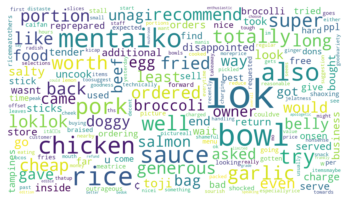

In [43]:

########### WORDCLOUD BC CANNOT TOPIC MODEL!!!!!!!!!!! ############# NEGATIVE REVIEWS
df_negative_reviews.columns = ['clean_text_2']

#REMOVE WORDS CONFIRM HIGH LOL
count_type = 'unigram'

result = count_words_from_dataframe(df_negative_reviews)
try: 
  del result['sticknbowls']
except:
  print('an error')

## soring the words based on their frequency
sorted_dic = ((k, result[k]) for k in sorted(result, key=result.get, reverse=True))

## write the dictionary in a file
with open(f"./sticknbowlsreviews_unigram_negreviews.csv", 'w', encoding="latin1") as fp:
    writer = csv.writer(fp, delimiter=',')
    writer.writerows(sorted_dic)

### Create ```plot``` folder 
os.makedirs('plot', exist_ok=True)

mypath="."
### We're using one of the utility function! "read_word_count_file"
fullTermsDict = read_word_count_file(f'{mypath}/sticknbowlsreviews_unigram_negreviews.csv')
outputfile = f"{mypath}/Colab Notebooks/Topic/wordcloud_count_unigram_sticknbowls_negreviews"
makeImage(fullTermsDict, outputfile)
